In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

2023-12-04 13:43:56.336955: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-04 13:43:56.736458: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-04 13:43:56.737409: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-04 13:43:58.165044: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
tf.__version__

'2.12.0'

# Classification

In [4]:
fmnist_data = keras.datasets.fashion_mnist

In [5]:
(x_train, y_train), (x_test, y_test) = fmnist_data.load_data()

4422102/4422102 [==============================] - 5s 1us/step


In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_test.shape

(10000, 28, 28)

In [8]:
y_train.shape

(60000,)

In [ ]:
y_train[:10]

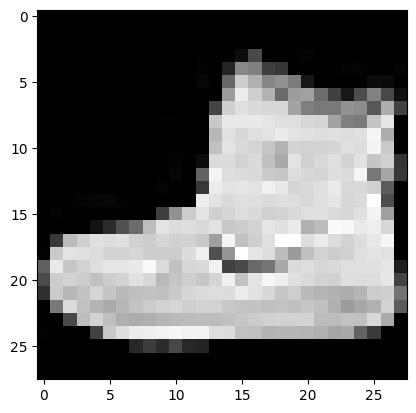

In [9]:
plt.imshow(x_train[0,], cmap="gray")

In [10]:
x_train, x_test = x_train/255.0, x_test/255.0

In [11]:
x_train.shape

(60000, 28, 28)

# Define Model 

In [12]:
init_1 = keras.initializers.VarianceScaling(scale=2.0, mode='fan_avg')

In [13]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),    
    keras.layers.Dense(100, kernel_initializer=init_1, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("elu"), 
    keras.layers.Dense(75, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.LeakyReLU(alpha=0.3),
    keras.layers.Dense(10, activation="softmax")
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 100)               78400     
                                                                 
 batch_normalization_1 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 75)                7

# Compile Model

## Power lr

In [18]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers.schedules import ExponentialDecay

initial_learning_rate = 0.01
lr_schedule = ExponentialDecay(initial_learning_rate, decay_steps=10000, decay_rate=0.9, staircase=True)

sgd = SGD(learning_rate=lr_schedule)

In [19]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=sgd,
              metrics=["accuracy"])

In [20]:
history_power = model.fit(x_train, y_train, epochs=50, validation_split=0.15)

Epoch 1/50


2023-12-04 15:48:26.119746: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 159936000 exceeds 10% of free system memory.


1575/1594 [============================>.] - ETA: 0s - loss: 0.6613 - accuracy: 0.7787

2023-12-04 15:48:31.077645: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 28224000 exceeds 10% of free system memory.


1594/1594 [==============================] - 5s 3ms/step - loss: 0.6593 - accuracy: 0.7794 - val_loss: 0.4854 - val_accuracy: 0.8302
Epoch 2/50
1594/1594 [==============================] - 4s 3ms/step - loss: 0.4859 - accuracy: 0.8300 - val_loss: 0.4348 - val_accuracy: 0.8457
Epoch 3/50
1594/1594 [==============================] - 5s 3ms/step - loss: 0.4456 - accuracy: 0.8434 - val_loss: 0.4104 - val_accuracy: 0.8543
Epoch 4/50
1594/1594 [==============================] - 4s 3ms/step - loss: 0.4209 - accuracy: 0.8516 - val_loss: 0.3917 - val_accuracy: 0.8593
Epoch 5/50
1594/1594 [==============================] - 5s 3ms/step - loss: 0.4030 - accuracy: 0.8586 - val_loss: 0.3839 - val_accuracy: 0.8656
Epoch 6/50
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3895 - accuracy: 0.8611 - val_loss: 0.3790 - val_accuracy: 0.8663
Epoch 7/50
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3740 - accuracy: 0.8670 - val_loss: 0.3663 - val_accuracy: 0.8672
Epo

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history_power.history["loss"], label="train loss")
ax.plot(history_power.history["accuracy"], label="train accuracy")
ax.plot(history_power.history["val_loss"], label="validation loss")
ax.plot(history_power.history["val_accuracy"], label="validation accuracy")
ax.legend()

## Exp lr

In [ ]:
def exp_lr_func(eta0, s):
  def exp_lr(epoch):
    return eta0*0.1**(epoch/s)
  return exp_lr
exp_lr_s = exp_lr_func(0.01, 10)  

In [ ]:
exp_lr_c = keras.callbacks.LearningRateScheduler(exp_lr_s)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, kernel_initializer=init_1, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("elu"),
    keras.layers.Dense(75, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.LeakyReLU(alpha=0.3),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
history_exp = model.fit(x_train, y_train, epochs=50,
                    validation_split=0.15,
                    callbacks=[exp_lr_c])

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history_exp.history["loss"], label="train loss")
ax.plot(history_exp.history["accuracy"], label="train accuracy")
ax.plot(history_exp.history["val_loss"], label="validation loss")
ax.plot(history_exp.history["val_accuracy"], label="validation accuracy")
ax.legend()

In [ ]:
plt.plot(history_exp.epoch, history_exp.history["lr"])

## Piecewise lr

In [ ]:
def pw_lr(epoch):
  if epoch < 10:
    return 0.01
  elif epoch < 20:
    return 0.005
  elif epoch < 40:
    return 0.001
  else:
    return 0.0001

In [ ]:
pw_lr_c = keras.callbacks.LearningRateScheduler(pw_lr)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, kernel_initializer=init_1, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("elu"),
    keras.layers.Dense(75, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.LeakyReLU(alpha=0.3),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
history_pw = model.fit(x_train, y_train, epochs=50,
                    validation_split=0.15,
                    callbacks=[pw_lr_c])

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history_pw.history["loss"], label="train loss")
ax.plot(history_pw.history["accuracy"], label="train accuracy")
ax.plot(history_pw.history["val_loss"], label="validation loss")
ax.plot(history_pw.history["val_accuracy"], label="validation accuracy")
ax.legend()

In [ ]:
plt.plot(history_pw.epoch, history_pw.history["lr"])

## Performance

In [ ]:
per_lr_c = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.1, patience=10)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, kernel_initializer=init_1, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("elu"),
    keras.layers.Dense(75, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.LeakyReLU(alpha=0.3),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
history_per = model.fit(x_train, y_train, epochs=50,
                    validation_split=0.15,
                    callbacks=[per_lr_c])

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history_per.history["loss"], label="train loss")
ax.plot(history_per.history["accuracy"], label="train accuracy")
ax.plot(history_per.history["val_loss"], label="validation loss")
ax.plot(history_per.history["val_accuracy"], label="validation accuracy")
ax.legend()

In [ ]:
plt.plot(history_per.epoch, history_per.history["lr"])

In [ ]:
min(history_per.history["val_loss"])

## 1cycle lr

In [ ]:
class Exp_lr(keras.callbacks.Callback):
  def __init__(self, factor):
    self.factor = factor
    self.lr = []
    self.loss = []
  
  def on_epoch_begin(self, epoch, logs):
    self.previous_loss = 0
  
  def on_batch_end(self, batch, logs):
    current_loss = logs["loss"]*(batch+1) - self.previous_loss*batch
    self.previous_loss = logs["loss"]
    self.lr.append(keras.backend.get_value(self.model.optimizer.learning_rate))
    self.loss.append(current_loss)
    keras.backend.set_value(self.model.optimizer.learning_rate,
                            self.model.optimizer.learning_rate*self.factor)

In [ ]:
def search_lr_loss(model, X, y, epochs=1, batch_size=32,
                   min_lr = 1e-6, max_lr = 10):
  model_weights = model.get_weights()
  iterations = int(X.shape[0]/batch_size)*epochs
  factor = np.exp(np.log(max_lr/min_lr)/iterations)
  initial_lr = keras.backend.get_value(model.optimizer.learning_rate)
  keras.backend.set_value(model.optimizer.learning_rate, min_lr)
  epx_lr = Exp_lr(factor)
  history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                      callbacks=[epx_lr])
  keras.backend.set_value(model.optimizer.learning_rate, initial_lr)
  model.set_weights(model_weights)
  return epx_lr.lr, epx_lr.loss

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, kernel_initializer=init_1, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("elu"),
    keras.layers.Dense(75, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.LeakyReLU(alpha=0.3),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
lr, loss = search_lr_loss(model, x_train, y_train)

In [ ]:
plt.plot(lr, loss)
plt.xscale("log")
plt.ylim(0, 5)

In [ ]:
class One_cycle_lr(keras.callbacks.Callback):
  def __init__(self, iterations, max_lr, init_lr=None,
               final_steps=None, final_lr=None):
    self.iterations = iterations
    self.max_lr = max_lr
    self.init_lr = init_lr or max_lr / 10
    self.final_steps = final_steps or int(iterations/10)+1
    self.half_iterations = int((iterations - self.final_steps)/2)
    self.final_lr = final_lr or self.init_lr/1000
    self.iteration = 0
  
  def interpolation(self, y2, y1, x2, x1):
    return (y2 - y1)/(x2 - x1)*(self.iteration - x1) + y1
  
  def on_batch_begin(self, batch, logs):
    if self.iteration < self.half_iterations:
      lr = self.interpolation(self.max_lr, self.init_lr,
                              self.half_iterations, 0)
    elif self.iteration < 2*self.half_iterations:
      lr = self.interpolation(self.init_lr, self.max_lr,
                              2*self.half_iterations, self.half_iterations)
    else:
      lr = self.interpolation(self.final_lr, self.init_lr,
                              self.iterations, 2*self.half_iterations)
    self.iteration += 1
    keras.backend.set_value(self.model.optimizer.learning_rate, lr)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, kernel_initializer=init_1, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("elu"),
    keras.layers.Dense(75, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.LeakyReLU(alpha=0.3),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
epochs = 50
batch_size = 32
iters = int(x_train.shape[0]/batch_size)*epochs
one_cycle_lr = One_cycle_lr(iters, max_lr=0.03)
history_onecycle = model.fit(x_train, y_train,
                             validation_split=0.15,
                             epochs=epochs,
                             callbacks=[one_cycle_lr])

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history_onecycle.history["loss"], label="train loss")
ax.plot(history_onecycle.history["accuracy"], label="train accuracy")
ax.plot(history_onecycle.history["val_loss"], label="validation loss")
ax.plot(history_onecycle.history["val_accuracy"], label="validation accuracy")
ax.legend()

# Save

In [ ]:
model.save("model0.h5")

In [ ]:
model0 = keras.models.load_model("model0.h5")

In [ ]:
model0.get_weights()[4]

In [ ]:
model1.get_weights()[4]

In [ ]:
model0_cloned = keras.models.clone_model(model0)
model0_cloned.set_weights(model0.get_weights())

In [ ]:
model0_cloned.get_weights()[4]

In [ ]:
model1 = keras.models.Sequential(model0.layers[:-1])
model1.add(keras.layers.Dense(1, activation="sigmoid"))
model1.summary()

In [ ]:
for layer in model1.layers[:-1]:
  layer.trainable = True
  print(layer.trainable)

In [ ]:
model1.summary()

In [ ]:
x_train_new = x_train[:5000, :, :]

In [ ]:
y_train_new = np.where(y_train == 9, 1, 0)[:5000]

In [ ]:
model1.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [ ]:
model1.fit(x_train_new, y_train_new, epochs=15, validation_split=0.15)

# Optimizers

In [ ]:
def func(x):
  return x**2

def func_grad(x):
  return 2*x

In [ ]:
def gradient_descent(lr, func_grad):
  x = -10
  x_values = [x]
  for i in range(10):
    x -= lr*func_grad(x)
    x_values.append(x)
  print("iteration 10, x: %s"%x)
  return x_values

In [ ]:
def search_path(x_vals, func):
  x_line = np.arange(-15, 15, 0.01)
  plt.plot(x_line, [func(x) for x in x_line])
  plt.plot(x_vals, [func(x) for x in x_vals], "ro-")

In [ ]:
x_values = gradient_descent(0.8, func_grad)
search_path(x_values, func)

In [ ]:
def func(x1, x2):
  return x1**2 + 2 * x2**2

def func_grad(x1, x2):
  return (2*x1, 4*x2)

In [ ]:
class Optimizers:
  def __init__(self, lr_schedule):
    self.lr_schedule = lr_schedule
  
  def lr(self, rate, t):
    if self.lr_schedule == "constant":
      return self.constant_lr(rate)
    elif self.lr_schedule == "power":
      return self.power_lr(rate, t)
  
  def constant_lr(self, rate):
    return rate
  
  def power_lr(self, rate, t):
    c = 1
    s = 10
    return rate/(1 + t/s)**c

  def gradient_descent(self, x1, x2, t1, t2, func_grad, rate, t):
    gr_x1, gr_x2 = func_grad(x1, x2)
    return x1 - self.lr(rate, t)*gr_x1, x2 - self.lr(rate, t)*gr_x2, 0, 0
  
  def stochastic_gradient_descent(self, x1, x2, t1, t2, func_grad):
    gr_x1, gr_x2 = func_grad(x1, x2)
    gr_x1 += np.random.normal(0, 1)
    gr_x2 += np.random.normal(0, 1)
    return x1 - self.lr_schedule*gr_x1, x2 - self.lr_schedule*gr_x2, 0, 0
  
  def gradient_descent_with_momentum(self, x1, x2, v1, v2, func_grad):
    alpha = 0.9
    gr_x1, gr_x2 = func_grad(x1, x2)
    v1 = alpha*v1 - self.lr_schedule*gr_x1
    v2 = alpha*v2 - self.lr_schedule*gr_x2
    return x1 + v1, x2 + v2, v1, v2
  
  def nesterov_gradient_descent_with_momentum(self, x1, x2, v1, v2, func_grad):
    alpha=0.9
    x1 += alpha*v1
    x2 += alpha*v2
    gr_x1, gr_x2 = func_grad(x1, x2)
    v1 = alpha*v1 - self.lr_schedule*gr_x1
    v2 = alpha*v2 - self.lr_schedule*gr_x2
    return x1 + v1, x2 + v2, v1, v2

  def ada_grad(self, x1, x2, r1, r2, func_grad):
    delta = 1e-7
    gr_x1, gr_x2 = func_grad(x1, x2)
    r1 += gr_x1**2
    r2 += gr_x2**2
    x1 -= self.lr_schedule/(delta + np.sqrt(r1))*gr_x1
    x2 -= self.lr_schedule/(delta + np.sqrt(r2))*gr_x2
    return x1, x2, r1, r2
  
  def rmsprop(self, x1, x2, r1, r2, func_grad):
    delta = 1e-7
    rho = 0.9
    gr_x1, gr_x2 = func_grad(x1, x2)
    r1 = r1*rho + (1-rho)*gr_x1**2
    r2 = r2*rho + (1-rho)*gr_x2**2
    x1 -= self.lr_schedule/np.sqrt(delta+r1)*gr_x1
    x2 -= self.lr_schedule/np.sqrt(delta+r2)*gr_x2
    return x1, x2, r1, r2

  def adam(self, x1, x2, s1, s2, r1, r2, t, func_grad):
    delta, rho1, rho2 = 1e-8, 0.9, 0.999
    gr_x1, gr_x2 = func_grad(x1, x2)

    s1 = rho1*s1 + (1-rho1)*gr_x1
    s2 = rho1*s2 + (1-rho1)*gr_x2

    r1 = rho2*r1 + (1-rho2)*gr_x1**2
    r2 = rho2*r2 + (1-rho2)*gr_x2**2

    shat1 = s1/(1-rho1**(t+1))
    shat2 = s2/(1-rho1**(t+1))

    rhat1 = r1/(1-rho2**(t+1))
    rhat2 = r2/(1-rho2**(t+1))

    x1 -= self.lr_schedule*shat1/(np.sqrt(rhat1)+delta)
    x2 -= self.lr_schedule*shat2/(np.sqrt(rhat2)+delta)

    return x1, x2, s1, s2, r1, r2

In [ ]:
def search(optimizer, func_grad, rate, iteration=20):
  x1, x2, t1, t2 = -5, -2, 0, 0
  x_iterations = [(x1, x2)]
  for i in range(iteration):
    x1, x2, t1, t2 = optimizer(x1, x2, t1, t2, func_grad, rate, i+1)
    x_iterations.append((x1, x2))
  print("epoch {}, x1:{}, x2:{}".format(i+1, x1, x2))
  return x_iterations

In [ ]:
def search_adam(optimizer_adam, func_grad, iterations=20):
  x1, x2, s1, s2, r1, r2 = -5, -2, 0, 0, 0, 0
  x_iterations = [(x1, x2)]
  for t in range(iterations):
    x1, x2, s1, s2, r1, r2 = optimizer_adam(x1, x2, s1, s2, r1, r2, t, func_grad)
    x_iterations.append((x1, x2))
  print("epoch {}, x1:{}, x2:{}".format(t+1, x1, x2))
  return x_iterations

In [ ]:
def search_path(func, x_iterations):
  plt.plot(*zip(*x_iterations), "-o", color="r")
  x1, x2 = np.meshgrid(np.arange(-5.5, 5.5, 0.1), np.arange(-5.5, 5.5, 0.1))
  plt.contourf(x1, x2, func(x1, x2))
  plt.xlabel("x1")
  plt.ylabel("x2")

In [ ]:
opt = Optimizers("constant")
search_path(func, search(opt.gradient_descent, func_grad, 0.5))

In [ ]:
opt = Optimizers("power")
search_path(func, search(opt.gradient_descent, func_grad, 0.5))

In [ ]:
opt = Optimizers("constant", 0.1)
search_path(func, search(opt.stochastic_gradient_descent, func_grad))

In [ ]:
opt = Optimizers("constant", 0.02)
search_path(func, search(opt.gradient_descent_with_momentum, func_grad))

In [ ]:
opt = Optimizers("constant", 0.02)
search_path(func, search(opt.nesterov_gradient_descent_with_momentum, func_grad))

In [ ]:
opt = Optimizers("constant", 0.5)
search_path(func, search(opt.ada_grad, func_grad))

In [ ]:
opt = Optimizers("constant", 0.5)
search_path(func, search(opt.rmsprop, func_grad))

In [ ]:
opt = Optimizers("constant", 0.3)
search_path(func, search_adam(opt.adam, func_grad))

# Overfitting

## L1 and L2

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regulizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal"),
    keras.layers.Dense(50, activation="elu",
                       kernel_initializer="he_normal"),                       
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

## Dropout

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(50, activation="elu",
                       kernel_initializer="he_normal"),
    keras.layers.Dropout(0.2),                       
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
history = model.fit(x_train, y_train, 
                    validation_split=0.15,
                    epochs=20)

In [ ]:
model_mcd = np.stack([model(x_test, training=True) for _ in range(50)])

In [ ]:
np.round(model.predict(x_test[:1]), 3)

In [ ]:
np.round(model_mcd.mean(axis=0)[:1], 3)

In [ ]:
class MonteCarloDropout(keras.layers.Dropout):
  def call(self, inputs):
    return super().call(inputs, training=True)

## Max-Norm

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01),
                       kernel_constraint=keras.constraints.max_norm(1.0)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(50, activation="elu",
                       kernel_initializer="he_normal"),
    keras.layers.Dropout(0.2),                       
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])